In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression, RFE


pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None)

import warnings
warnings.filterwarnings("ignore")

import wrangle

# Project Goal
    - Create a ML model to help predict individuals who are at risk for heart disease using key indicators


# Project Description

 Heart disease is the leading cause of death in the United States. The term 'heart disease' refers to several types of heart conditions. In the Unites States, the most common type of heart disease is coronary arter disease(CAD), which can lead to heart attack. You can greately reduce your risk for heart disease through lifestyle changes and, in some cases, medicine.

# Initial Hypothesis/Questions

    - Does risk of heart disease increase as age increases?
    - Does difficulty walking up stairs a key indicator for at risk of heart disease? 
    - Does being diabetic increase your risk for heart disease? 
    - Is smoking a key indicator of those at risk of heart disease?

# Wrangle Heart Disease Data
To acquire the heart disease data, download the .csv file and save it to your computer, use pandas to read the .csv
- The dataset is from the 2020 annual CDC survey of 400k adults the responses related to their health status.

In [2]:
df = wrangle.acquire_heart_data()
df.head(2)

Dataframe Shape
(319795, 18)
 


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No


# Prepare

To prepare the data, the created functions will do the following:
- Rename all columns for readability
- Dummy Vars: Convert all columns to ML friendly values
- Normalize the numerical data using MinMaxScaler 
- Scale the data 

### Let's prep the data and see what we are working with

In [3]:
new_df = wrangle.prep_data()
new_df.head(2)

New Dataframe Shape
(319795, 26)
 


,BMI,physical_health,mental_health,age_category,gen_health,sleep_time,heart_disease_Yes,smoking_Yes,alcohol_drinking_Yes,stroke_Yes,diff_walking_Yes,sex_Male,physical_activity_Yes,asthma_Yes,kidney_disease_Yes,skin_cancer_Yes,race_American Indian/Alaskan Native,race_Asian,race_Black,race_Hispanic,race_Other,race_White,diabetic_No,"diabetic_No, borderline diabetes",diabetic_Yes,diabetic_Yes (during pregnancy)
0,16.60,3.0,30.0,7,3,5.0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0
1,20.34,0.0,0.0,12,3,7.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [4]:
# Data will be downsampled for better exploration and modeling
new_df = wrangle.downsample_data(new_df)

(54746, 26)
Heart Disease Counts in Train dataframe
 
0    27373
1    27373
Name: heart_disease_Yes, dtype: int64


### Let's split the data for Exploration

In [5]:
train, validate, test = wrangle.split_data(new_df)
train.shape, validate.shape, test.shape

((30657, 26), (13139, 26), (10950, 26))

- Our data is now split into three samples so that we can explore, fit models, and evaluate without looking at new data.
- The validate sample is used to verify that our models built are not overfit to the train dataset
- The test set is used to give an estimate of how this model will perform on new data

## Data Context
- The data is made up of 54,746 Rows and 26 columns

- Heart disease a greater risk for individuals who:

- Are higher in age

- Have difficulty walking/ climbing stairs

- Are diabetic

- Smoke cigarettes


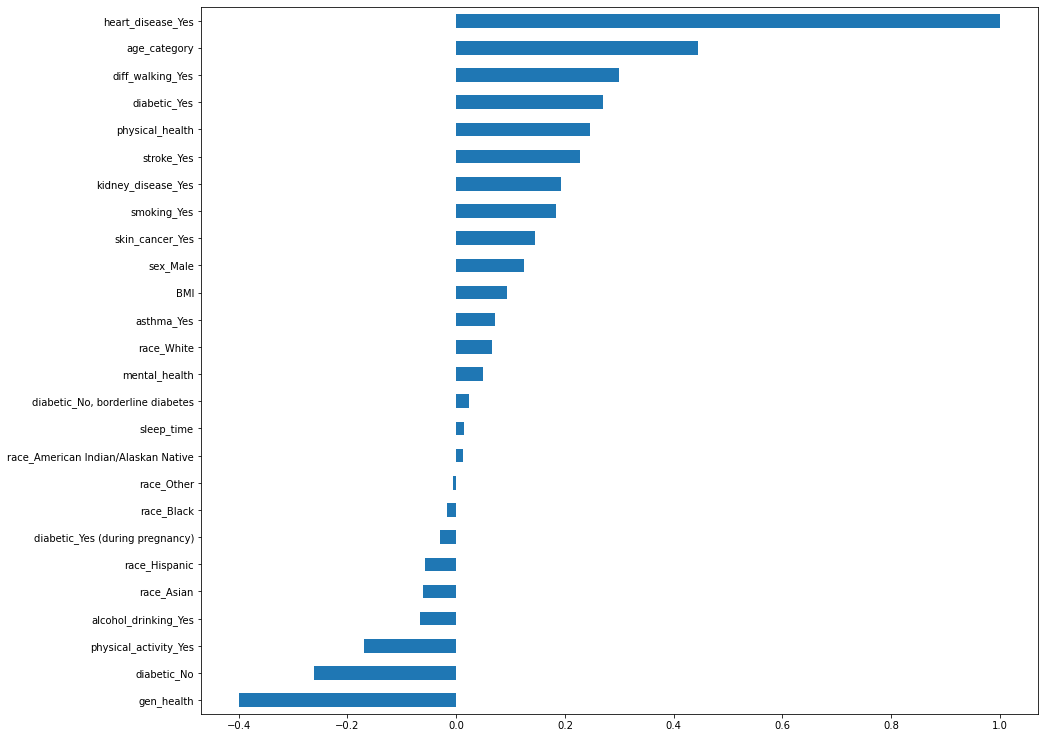

In [6]:
train.corr()['heart_disease_Yes'].sort_values().plot(kind='barh', figsize=(15,13))
None

## Exploratory Analysis : Who is at higher risk of heart disease?
Further analysis will answer the following questions:

1. Does risk of heart disease increase as age increases?
2. Does difficulty walking up stairs a key indicator for at risk of heart disease? 
3. Does being diabetic increase your risk for heart disease? 
4. Is smoking a key indicator of those at risk of heart disease?


# Question 1

12    4096
10    4075
9     3805
8     3482
11    3109
7     2651
6     2060
5     1540
4     1419
3     1239
0     1189
2     1075
1      917
Name: age_category, dtype: int64


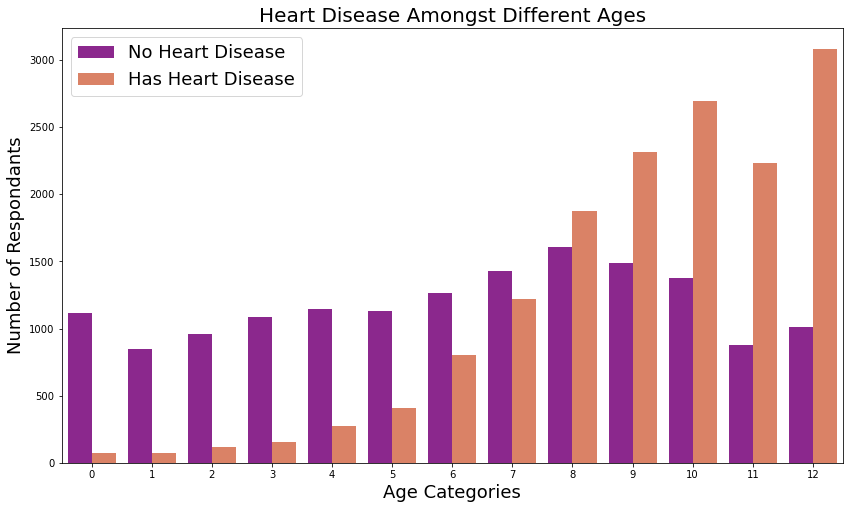

In [7]:
# Looking at the different age columns and the number of respondants with heart disease

plt.figure(figsize = (14, 8))
#Heart = train.loc[train[‘heart_disease_Yes’] == 0]
sns.countplot(x='age_category', hue = 'heart_disease_Yes', palette ='plasma', data = train)
plt.title('Heart Disease Amongst Different Ages', fontsize = 20)
plt.legend(labels = ['No Heart Disease', 'Has Heart Disease'], fontsize = 18)
plt.xlabel('Age Categories', fontsize = 18)
plt.ylabel('Number of Respondants', fontsize = 18)

print(train.age_category.value_counts(normalize = False))


## Null Hypothesis: Heart disease Respondants ages are equal to or less than all customers

## Alternate Hypothesis: Average Age for heart disease respondants are higher than the average respondants age

In [8]:
# Independent groups. Heart disease vs everyone and comparing ages

alpha = .05
churn_sample = train[train.heart_disease_Yes ==1].age_category
overall_mean = train.age_category.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)
if p/2 > alpha:
    print('We fail to reject the null hypothesis')
elif t <0:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

print(t, p/2, alpha)

We reject the null hypothesis
77.88735777749206 0.0 0.05


# Question 2

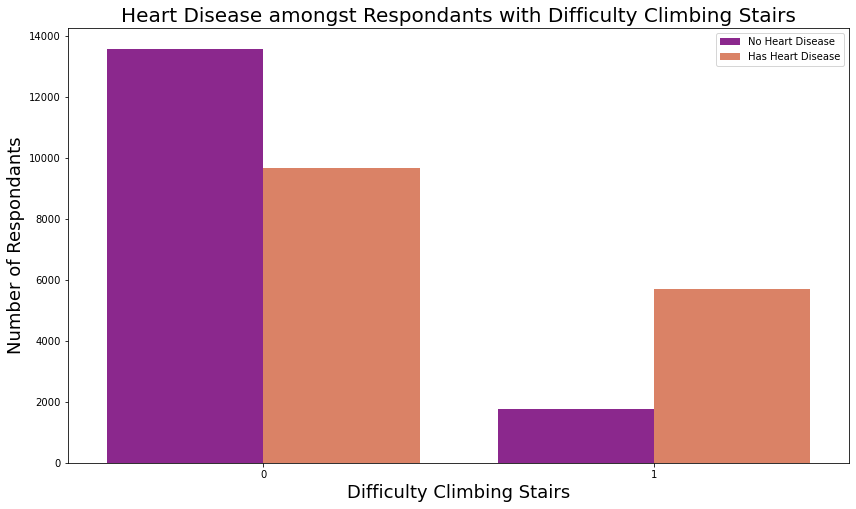

In [9]:
# plot visualization of number of respondants with difficulty walking up stairs and heart disease
plt.figure(figsize=(14,8))
sns.countplot(x='diff_walking_Yes', hue='heart_disease_Yes', palette='plasma', data=train)
plt.title('Heart Disease amongst Respondants with Difficulty Climbing Stairs', fontsize=20)
plt.legend(labels=['No Heart Disease','Has Heart Disease'])
plt.xlabel('Difficulty Climbing Stairs', fontsize = 18)
plt.ylabel('Number of Respondants', fontsize =18)
None

## Null Hypothesis - Difficulty Walking and Having heart disease are independent of each other

## Alternative hypothesis - Difficulty Walking and Having heart disease are not independent of each other

In [10]:
alpha = .05 

observed = pd.crosstab(train.heart_disease_Yes, train.diff_walking_Yes)
observed

chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('====================\nExpected\n')
print(expected)
print('====================\n')
print(f'chi^2 = {chi2:.2f}')
print(f'p     = {p:.2f}')
print(' ')
if p<alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Observed

[[13570  1758]
 [ 9647  5682]]
Expected

[[11608.1213426  3719.8786574]
 [11608.8786574  3720.1213426]]

chi^2 = 2731.07
p     = 0.00
 
We reject the null hypothesis.


# Question 3

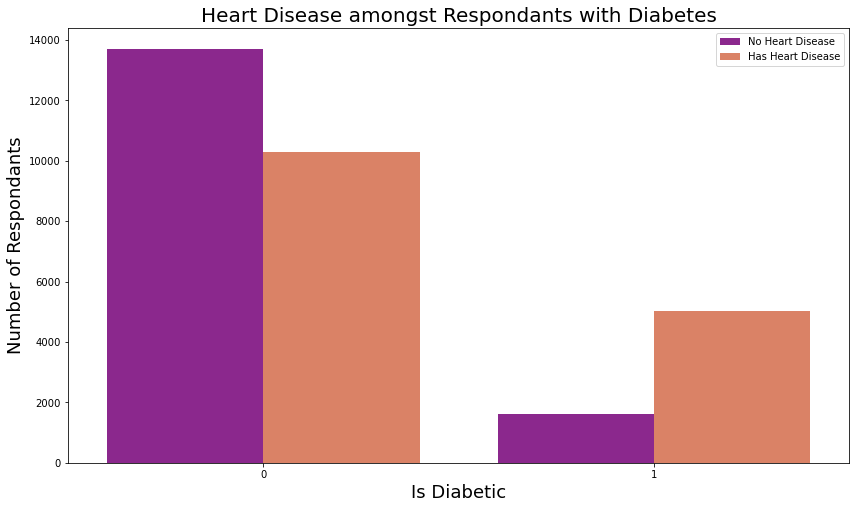

In [11]:
# plot visualization of number of respondants with diabetes and heart disease
plt.figure(figsize=(14,8))
sns.countplot(x='diabetic_Yes', hue='heart_disease_Yes', palette='plasma', data=train)
plt.title('Heart Disease amongst Respondants with Diabetes', fontsize=20)
plt.legend(labels=['No Heart Disease','Has Heart Disease'])
plt.xlabel('Is Diabetic', fontsize = 18)
plt.ylabel('Number of Respondants', fontsize =18)
None

# Question 4

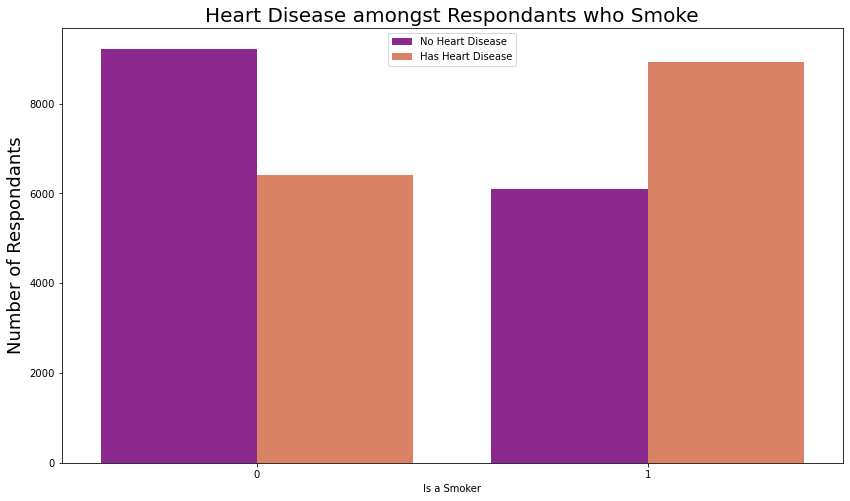

In [12]:
# plot visualization of number of respondants who smoke and have heart disease
plt.figure(figsize=(14,8))
sns.countplot(x='smoking_Yes', hue='heart_disease_Yes', palette='plasma', data=train)
plt.title('Heart Disease amongst Respondants who Smoke', fontsize=20)
plt.legend(labels=['No Heart Disease','Has Heart Disease'])
plt.xlabel('Is a Smoker')
plt.ylabel('Number of Respondants', fontsize =18)
None

In [13]:
alpha = .05 

observed = pd.crosstab(train.heart_disease_Yes, train.smoking_Yes)
observed
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('====================\nExpected\n')
print(expected)
print('====================\n')
print(f'chi^2 = {chi2:.2f}')
print(f'p     = {p:.2f}')
if p<alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject the null hypothesis.')

Observed

[[9222 6106]
 [6401 8928]]
Expected

[[7811.24519686 7516.75480314]
 [7811.75480314 7517.24519686]]

chi^2 = 1038.35
p     = 0.00
We reject the null hypothesis.


# Key Takeaways/Features from exploration:
- Respondants age can be key indicator for risk of heart disease

- Respondants who have difficulty walking or climbing stairs are more likely to have heart disease

- Respondants with diabetes are at greater risk for heart disease

- Respondants who smoke are at greater risk for heart disease

# Key Indicators for Heart Disease
### Classification machine learning algorithms will be fit with our training data and evaluated on our validate data
### Models will be fit with key features drawn from exploration phase:
    - age_category, diff_walking, diabetic_yes, physical_health, stroke_yes, smoking_yes, kidney_disease_Yes, gen_health
    
### The model chosen will be based on accuracy and its performance over the baseline

In [14]:
# Baseline
baseline_accuracy = (train.heart_disease_Yes == 1).mean()
print(f' Any new model must be more accurate than the Baseline Accuracy of {baseline_accuracy :.2%}')

 Any new model must be more accurate than the Baseline Accuracy of 50.00%


In [15]:
# Data must be scaled for the ML models
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train, validate, test)

In [16]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.get_Xtrain_ytrain(train_scaled, train, validate, validate_scaled, test, test_scaled )
X_train.head(2)

,physical_health,age_category,gen_health,smoking_Yes,stroke_Yes,diff_walking_Yes,kidney_disease_Yes,diabetic_Yes
126088,0.0,12,3,0,0,1,0,0
41910,1.0,9,2,0,0,0,1,1


# Random Forest Model

In [17]:
wrangle.random_forest_model(X_train, X_validate, y_train, y_validate)

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,1,1,0.731415,0.727909,0.003506
1,2,2,0.744039,0.738641,0.005398
2,3,3,0.748834,0.744882,0.003952
3,4,4,0.749421,0.745414,0.004007
4,5,5,0.751835,0.746023,0.005812
5,6,6,0.753237,0.746556,0.006681
6,7,7,0.757478,0.749220,0.008258
7,8,8,0.761327,0.751047,0.010280
8,9,9,0.761425,0.751199,0.010226
9,10,10,0.763317,0.751123,0.012194


In [18]:
wrangle.rf_report(X_train, X_validate, y_train, y_validate)

train_accuracy: 0.7614247969468637
validate_accuracy: 0.7511987213638786


# KNearestNeighbors Model

In [19]:
wrangle.KNN_model(X_train, X_validate, y_train, y_validate)

,k,train_accuracy,validate_accuracy,difference
0,1,0.729915,0.676307,0.053608
1,2,0.706723,0.656443,0.050280
2,3,0.741071,0.700129,0.040941
3,4,0.734645,0.691986,0.042659
4,5,0.754249,0.723267,0.030982
5,6,0.739146,0.703554,0.035592
6,7,0.756467,0.733922,0.022545
7,8,0.746387,0.725245,0.021142
8,9,0.751737,0.735444,0.016293
9,10,0.747464,0.729203,0.018261


In [20]:
wrangle.knn_results(X_train, y_train, X_validate, y_validate)

train_accuracy:  75.27%
validate_accuracy:  73.88%


# Logistic Regression Model

In [21]:
wrangle.logistic_regression_model(X_train, X_validate, y_train, y_validate)

,C,train_accuracy,validate_accuracy,difference
0,0.001,0.752552,0.751275,0.001278
1,0.005,0.755553,0.752036,0.003517
2,0.010,0.755684,0.752416,0.003267
3,0.050,0.756043,0.752949,0.003093
4,0.100,0.756141,0.753330,0.002811
5,0.500,0.756075,0.753254,0.002822
6,1.000,0.756075,0.753254,0.002822
7,5.000,0.756108,0.753254,0.002854
8,10.000,0.756108,0.753254,0.002854
9,50.000,0.756108,0.753254,0.002854


In [22]:
wrangle.lr_results(X_train, y_train, X_validate, y_validate)

train_accuracy:  75.61%
validate_accuracy:  75.33%


# Model Accuracy Results

In [23]:
wrangle.model_accuracy(X_train, y_train, X_validate, y_validate, X_test, y_test)

Accuracy of Logistic Regression on the training set is 75.61%
Accuracy of Logistic Regression on the validation set is 75.33%
--------------------------------------------------------------------
Accuracy of Random Forest on the training set is 76.14%
Accuracy of Random Forest on the validation set is 75.12%
--------------------------------------------------------------------
Accuracy of KNN on the training set is 75.27%
Accuracy of KNN on the validation set is 73.88%


## The Random Forest model performed the best

# Expectation of Model performance

In [24]:
wrangle.rf_test(X_test, y_test, test)

Baseline accuracy for the training data set is 50.00%
Accuracy of Random Forest on the test set is 75.57%
------------------------------------------------------------------


NameError: name 'model' is not defined

# CONCLUSION 
## SUMMARY
### Project goals were:
- Identify key indicators of heart disease
- Construct a model that accurately predicts at risk individuals

### Key indicators of heart disease were identified as:
- Age category
- Difficulty walking/climbing stairs
- Diabetes
- Smoking
- Physical health history

# RECOMMENDATIONS
- Educate the public on preventative measures
- The greatest key indicators are lifestyle related
    - Prevention is far cheaper than treatment
- Dietary recommendations, simple lifestyle changes, and increased physical activity can be cheap and effective

# NEXT STEPS
- Tracking and keeping up with feedback on treatment plans will be useful data to analyze
    - This could prove useful to measure effectiveness of preventative measures and treatment plans